<a href="https://colab.research.google.com/github/nklsrmy/CCADMACL_EXAM/blob/main/Midterm_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CCADMACL (Midterm Exam)

## Import the libraries

In [116]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

from collections import Counter

## Load the datasets

In [117]:
face_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/face.csv?raw=true")
chrome_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/chrome.csv?raw=true")
lines2_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/lines2.csv?raw=true")
supernova_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/supernova.csv?raw=true")
network_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/network.csv?raw=true")
spirals_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/spirals.csv?raw=true")
densedisk_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/densedisk.csv?raw=true")
rings_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/rings.csv?raw=true")
chainlink_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/chainlink.csv?raw=true")

## Plot the datasets

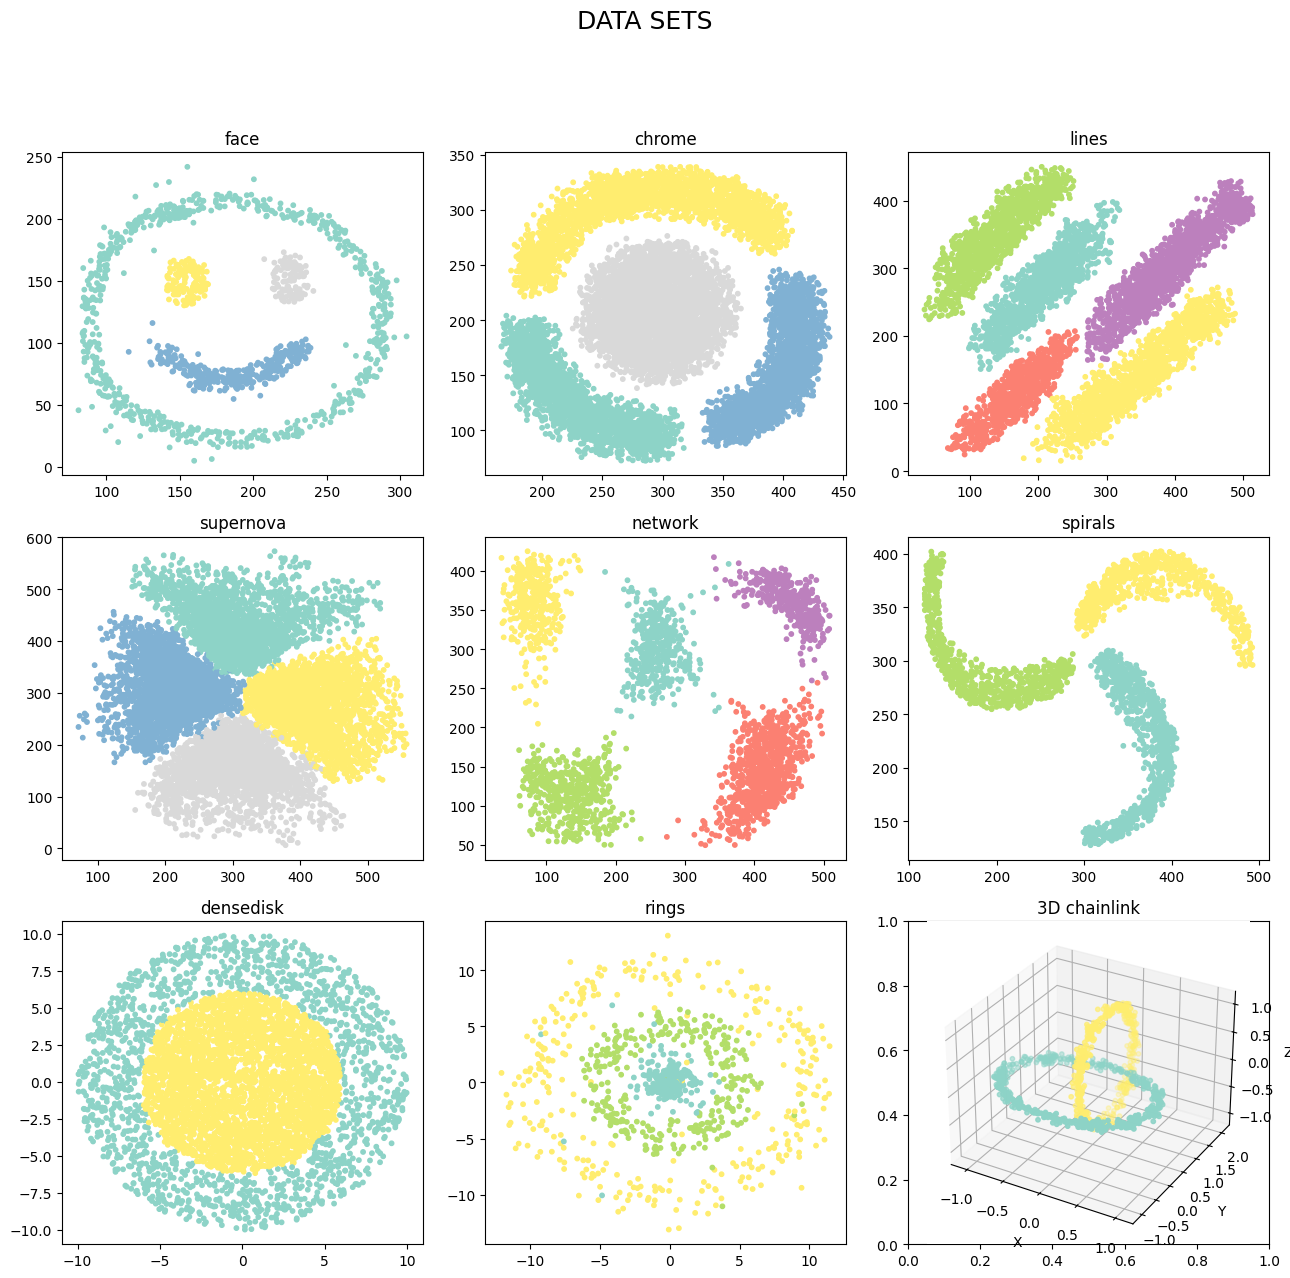

In [118]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 13))
fig.suptitle('DATA SETS\n', size=18)

# Plot the 2D scatterplots
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("face")

axes[0, 1].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[0, 1].set_title("chrome")

axes[0, 2].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[0, 2].set_title("lines")

axes[1, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("supernova")

axes[1, 1].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[1, 1].set_title("network")

axes[1, 2].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[1, 2].set_title("spirals")

axes[2, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("densedisk")

axes[2, 1].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[2, 1].set_title("rings")

# Add a 3D plot
ax3d = fig.add_subplot(3, 3, 9, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

## A. Use K-means to cluster each dataset

1. Create each copy of the dataset for k-means

In [169]:
# put your answer here
data_face = face_df.copy()
data_chrome = chrome_df.copy()
data_lines2 = lines2_df.copy()
data_supernova = supernova_df.copy()
data_network = network_df.copy()
data_spirals = spirals_df.copy()
data_densedisk = densedisk_df.copy()
data_rings = rings_df.copy()
data_chainlink = chainlink_df.copy()

In [170]:
color_face = face_df['color']
color_chrome = chrome_df['color']
color_lines2 = lines2_df['color']
color_supernova = supernova_df['color']
color_network = network_df['color']
color_spirals = spirals_df['color']
color_densedisk = densedisk_df['color']
color_rings = rings_df['color']
color_chainlink = chainlink_df['color']

2. Drop the "color" column on all datasets

In [171]:
# put your answer here
data_face = data_face.drop('color', axis=1)
data_chrome = data_chrome.drop('color', axis=1)
data_lines2 = data_lines2.drop('color', axis=1)
data_supernova = data_supernova.drop('color', axis=1)
data_network = data_network.drop('color', axis=1)
data_spirals = data_spirals.drop('color', axis=1)
data_densedisk = data_densedisk.drop('color', axis=1)
data_rings = data_rings.drop('color', axis=1)
data_chainlink = data_chainlink.drop('color', axis=1)

3. Train a K-means model for each dataset.

In [192]:
# put your answer here
from sklearn.metrics import silhouette_score

def train_kmeans_model(data, n_clusters=4, random_state=42):
  kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
  kmeans.fit(data)
  labels = kmeans.labels_
  silhouette_coeff = silhouette_score(data, labels)
  return kmeans, silhouette_coeff

from sklearn.model_selection import train_test_split
# Train K-Means models for each dataset
kmeans_face, silhouette_face = train_kmeans_model(data_face)
kmeans_chrome, silhouette_chrome = train_kmeans_model(data_chrome)
kmeans_lines2, silhouette_lines2 = train_kmeans_model(data_lines2)
kmeans_supernova, silhouette_supernova = train_kmeans_model(data_supernova)
kmeans_network, silhouette_network = train_kmeans_model(data_network)
kmeans_spirals, silhouette_spirals = train_kmeans_model(data_spirals)
kmeans_densedisk, silhouette_densedisk = train_kmeans_model(data_densedisk)
kmeans_rings, silhouette_rings = train_kmeans_model(data_rings)
kmeans_chainlink, silhouette_chainlink = train_kmeans_model(data_chainlink)

4. Add a "Cluster" column for each data set

In [193]:
# put your answer here
data_face['Cluster'] = kmeans_face.labels_
data_chrome['Cluster'] = kmeans_chrome.labels_
data_lines2['Cluster'] = kmeans_lines2.labels_
data_supernova['Cluster'] = kmeans_supernova.labels_
data_network['Cluster'] = kmeans_network.labels_
data_spirals['Cluster'] = kmeans_spirals.labels_
data_densedisk['Cluster'] = kmeans_densedisk.labels_
data_rings['Cluster'] = kmeans_rings.labels_
data_chainlink['Cluster'] = kmeans_chainlink.labels_

5. Plot the Correct cluster and the K-means cluster

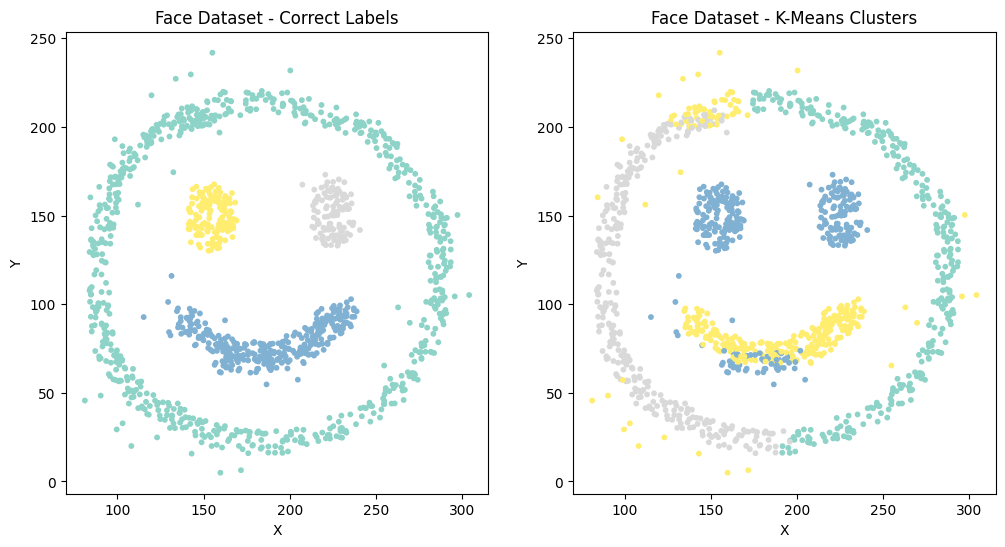

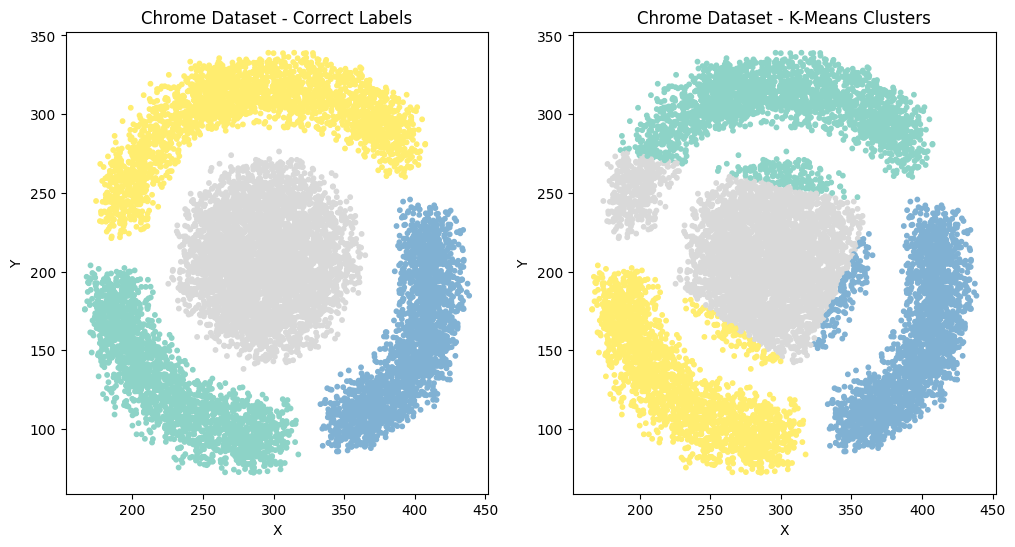

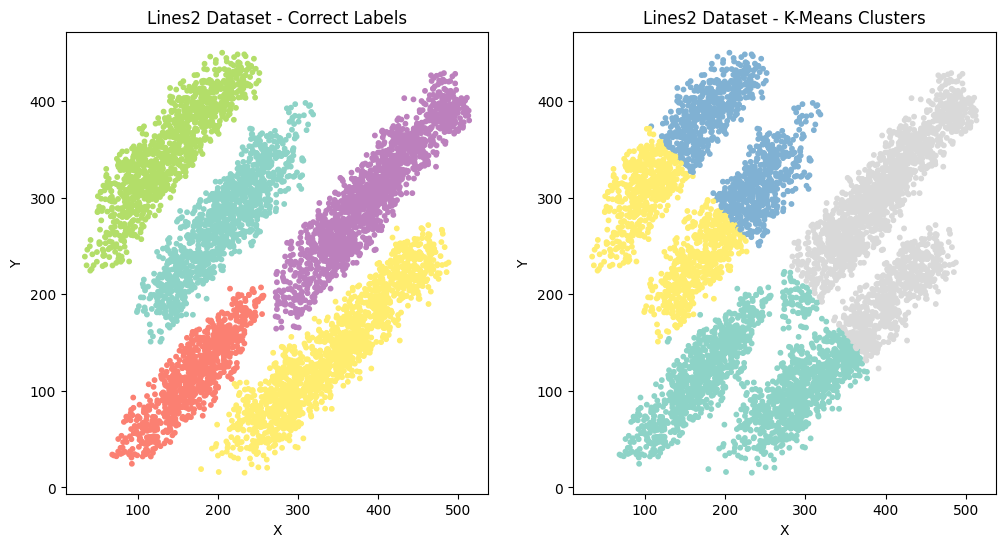

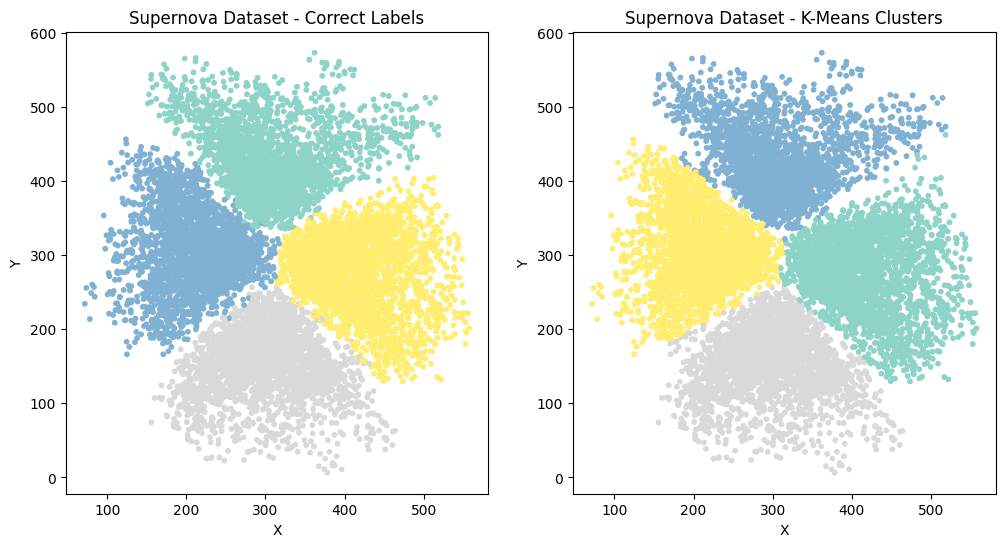

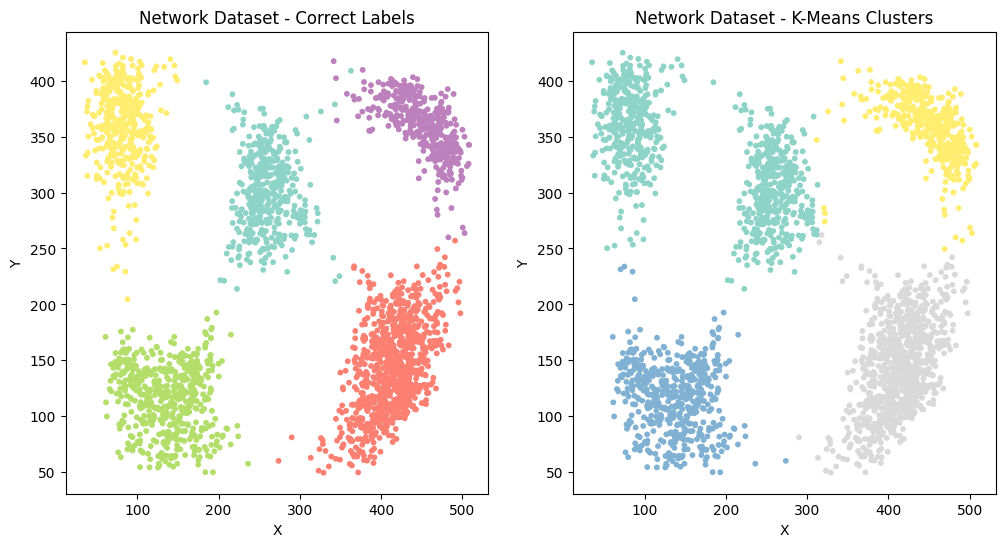

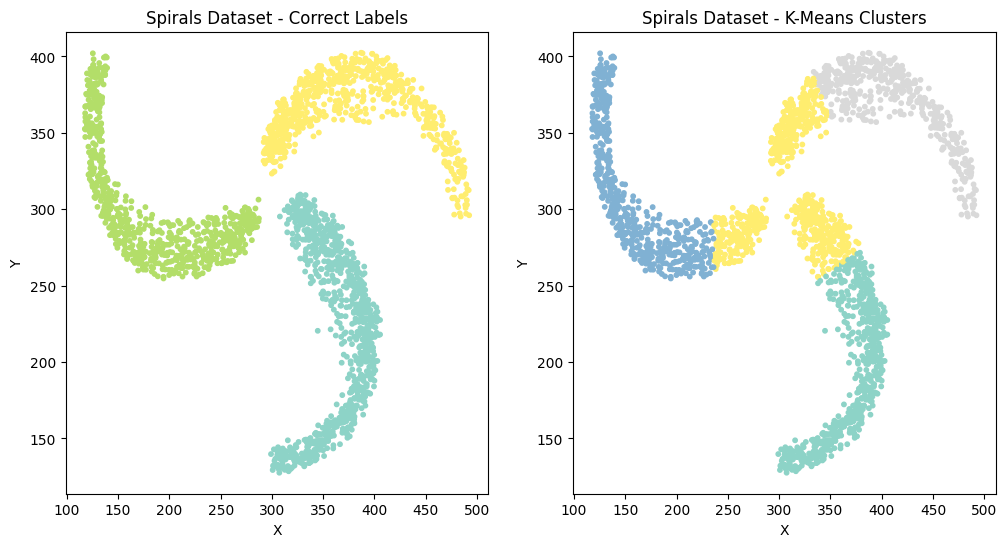

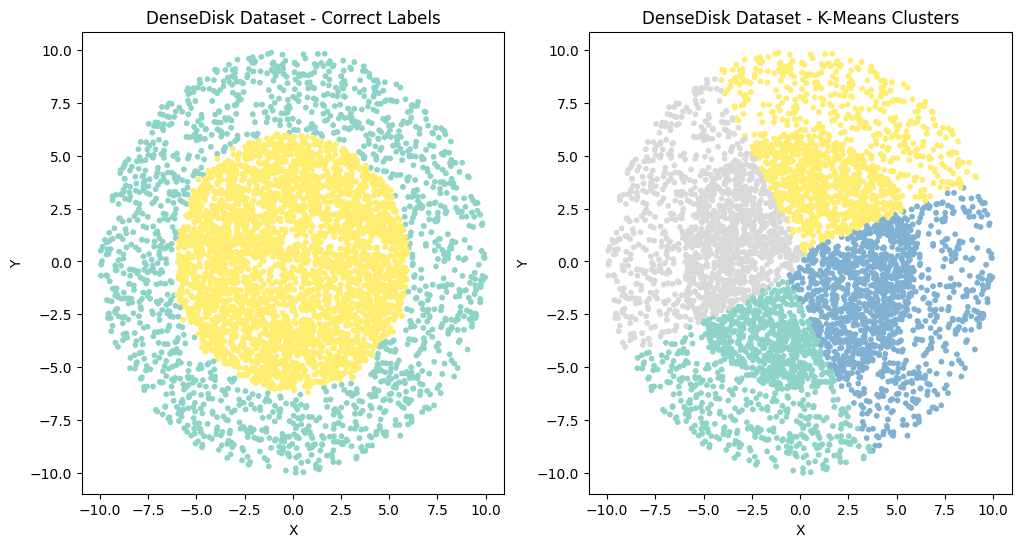

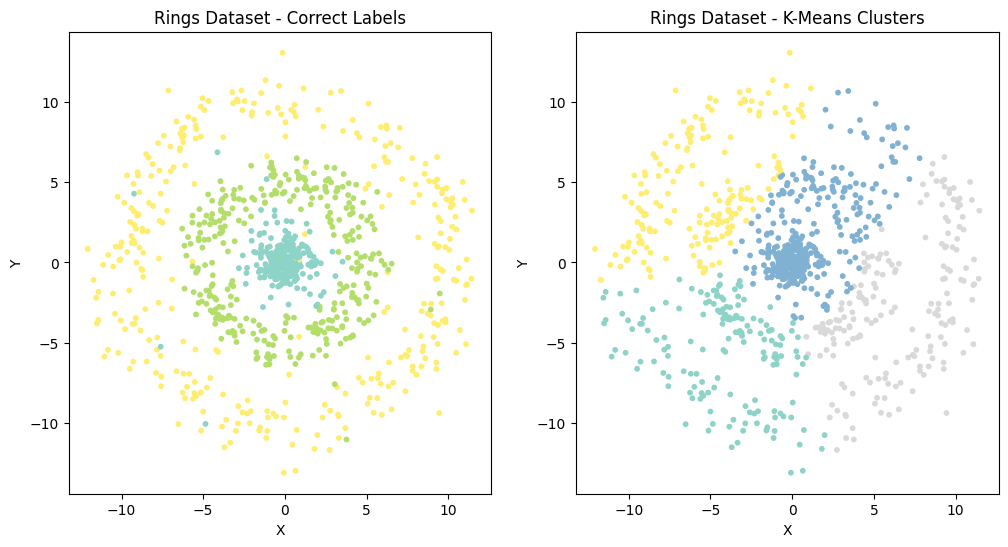

In [194]:
def plot_clusters(data, kmeans_model, correct_labels, title):
  """
  Plots the correct clusters and K-Means clusters side-by-side.

  Args:
    data: The DataFrame containing the data.
    kmeans_model: The trained K-Means model.
    correct_labels: A Series or array containing the correct labels.
    title: The title of the plot.
  """

  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  # Plot with correct labels
  axes[0].scatter(data['x'], data['y'], c=correct_labels, cmap='Set3', s=10)
  axes[0].set_title(f"{title} - Correct Labels")
  axes[0].set_xlabel('X')
  axes[0].set_ylabel('Y')

  # Plot with predicted labels
  axes[1].scatter(data['x'], data['y'], c=kmeans_model.labels_, cmap='Set3', s=10)
  axes[1].set_title(f"{title} - K-Means Clusters")
  axes[1].set_xlabel('X')
  axes[1].set_ylabel('Y')

  # Check if data_chainlink has a 'z' column
  if 'z' in data:
    fig_3d = plt.figure()
    ax_3d = fig_3d.add_subplot(111, projection='3d')
    ax_3d.scatter(data['x'], data['y'], data['z'], c=kmeans_model.labels_, cmap='Set3')
    ax_3d.set_xlabel('X')
    ax_3d.set_ylabel('Y')
    ax_3d.set_zlabel('Z')
    ax_3d.set_title(f"{title} - 3D Scatter")

  plt.show()

# Assuming you have the data and KMeans models for each dataset
plot_clusters(data_face, kmeans_face, color_face, "Face Dataset")
plot_clusters(data_chrome, kmeans_chrome, color_chrome, "Chrome Dataset")
plot_clusters(data_lines2, kmeans_lines2, color_lines2, "Lines2 Dataset")
plot_clusters(data_supernova, kmeans_supernova, color_supernova, "Supernova Dataset")
plot_clusters(data_network, kmeans_network, color_network, "Network Dataset")
plot_clusters(data_spirals, kmeans_spirals, color_spirals, "Spirals Dataset")
plot_clusters(data_densedisk, kmeans_densedisk, color_densedisk, "DenseDisk Dataset")
plot_clusters(data_rings, kmeans_rings, color_rings, "Rings Dataset")

## B. Use Agglomerative Clustering to cluster each dataset

1. Create each copy of the dataset for Agglomerative Clustering

In [195]:
# put your answer here
data_face = face_df.copy()
data_chrome = chrome_df.copy()
data_lines2 = lines2_df.copy()
data_supernova = supernova_df.copy()
data_network = network_df.copy()
data_spirals = spirals_df.copy()
data_densedisk = densedisk_df.copy()
data_rings = rings_df.copy()
data_chainlink = chainlink_df.copy()

In [196]:
color_face = face_df['color']
color_chrome = chrome_df['color']
color_lines2 = lines2_df['color']
color_supernova = supernova_df['color']
color_network = network_df['color']
color_spirals = spirals_df['color']
color_densedisk = densedisk_df['color']
color_rings = rings_df['color']
color_chainlink = chainlink_df['color']

2. Drop the "color" column on all datasets

In [197]:
# put your answer here
data_face = data_face.drop('color', axis=1)
data_chrome = data_chrome.drop('color', axis=1)
data_lines2 = data_lines2.drop('color', axis=1)
data_supernova = data_supernova.drop('color', axis=1)
data_network = data_network.drop('color', axis=1)
data_spirals = data_spirals.drop('color', axis=1)
data_densedisk = data_densedisk.drop('color', axis=1)
data_rings = data_rings.drop('color', axis=1)
data_chainlink = data_chainlink.drop('color', axis=1)

3. Train a Agglomerative Clustering model for each dataset.

In [162]:
# put your answer here
def train_agglomerative_model(data, n_clusters=4, linkage='ward'): # Set a default value for n_clusters
  agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
  agg_clustering.fit(data)
  return agg_clustering

agg_face = train_agglomerative_model(data_face)
agg_chrome = train_agglomerative_model(data_chrome)
agg_lines2 = train_agglomerative_model(data_lines2)
agg_supernova = train_agglomerative_model(data_supernova)
agg_network = train_agglomerative_model(data_network)
agg_spirals = train_agglomerative_model(data_spirals)
agg_densedisk = train_agglomerative_model(data_densedisk)
agg_rings = train_agglomerative_model(data_rings)
agg_chainlink = train_agglomerative_model(data_chainlink)

4. Add a "Cluster" column for each data set

In [198]:
# put your answer here
data_face['Cluster'] = agg_face.labels_
data_chrome['Cluster'] = agg_chrome.labels_
data_lines2['Cluster'] = agg_lines2.labels_
data_supernova['Cluster'] = agg_supernova.labels_
data_network['Cluster'] = agg_network.labels_
data_spirals['Cluster'] = agg_spirals.labels_
data_densedisk['Cluster'] = agg_densedisk.labels_
data_rings['Cluster'] = agg_rings.labels_
data_chainlink['Cluster'] = agg_chainlink.labels_

5. Plot the Correct cluster and the Agglomerative cluster

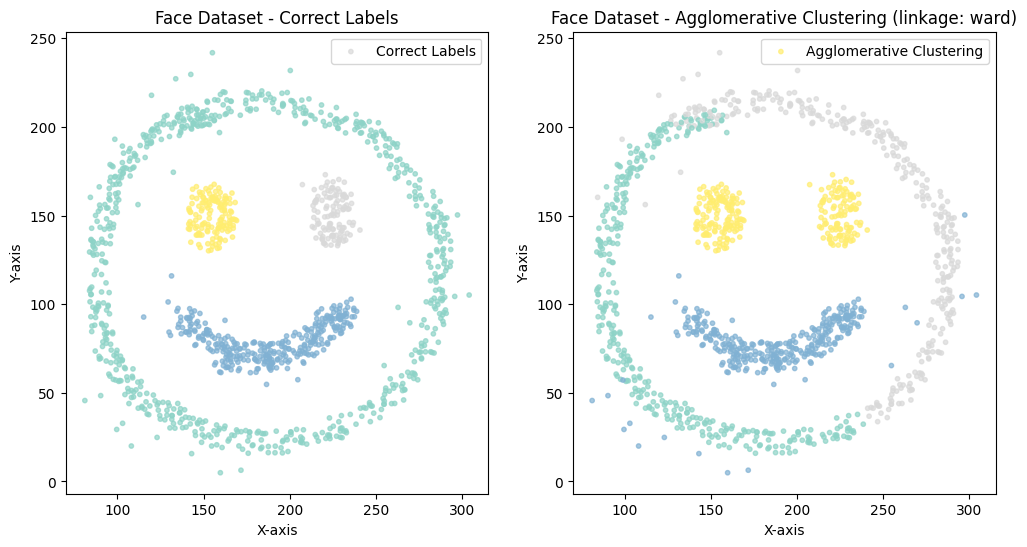

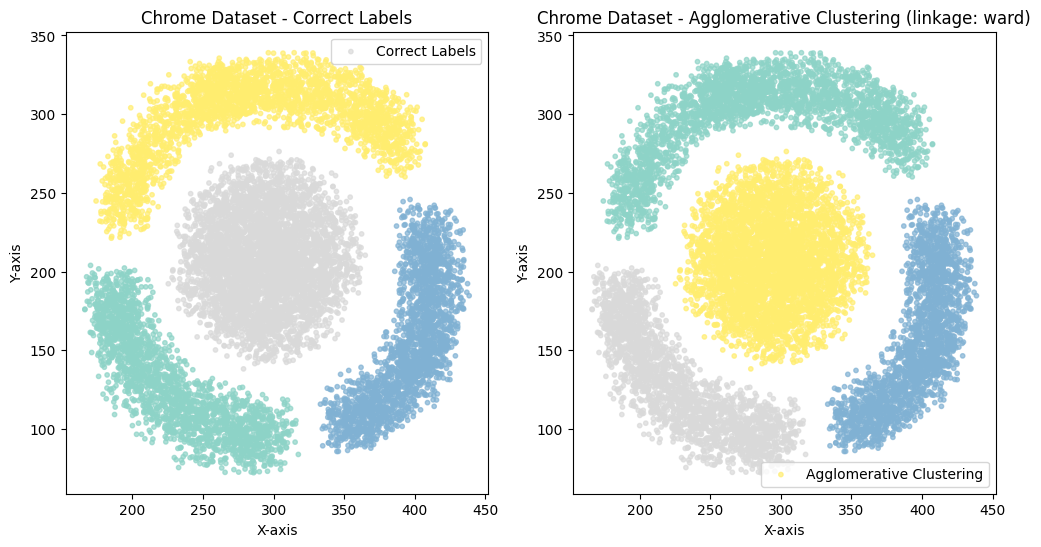

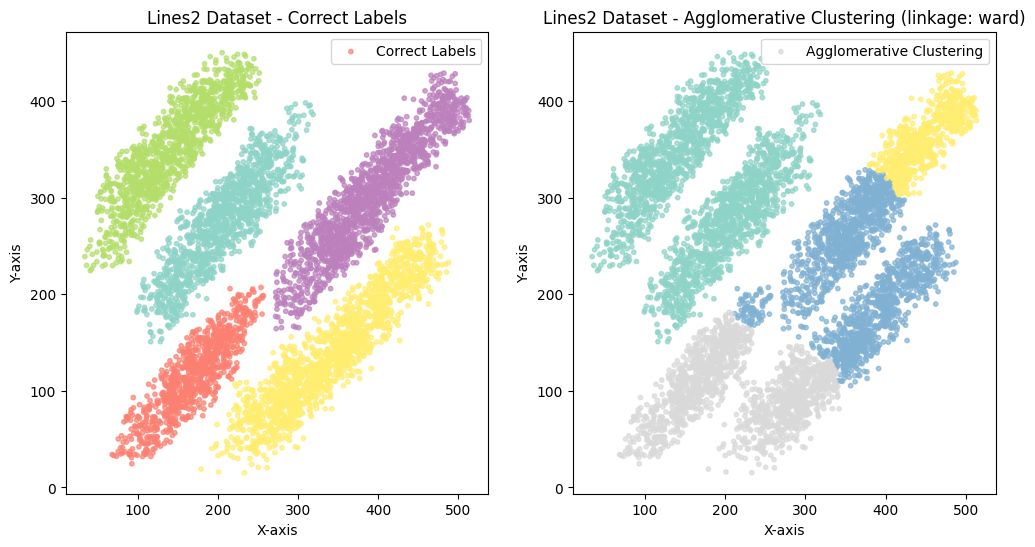

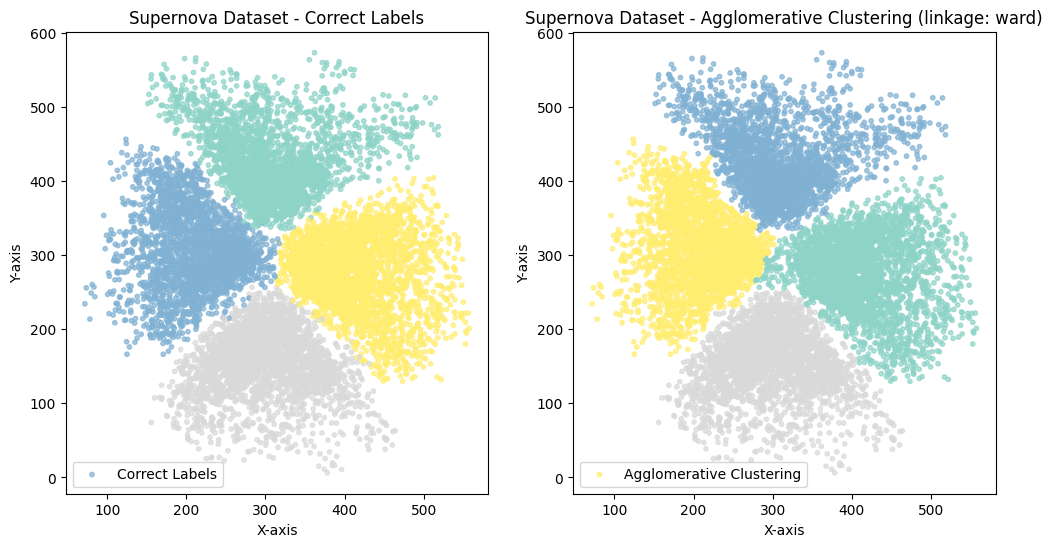

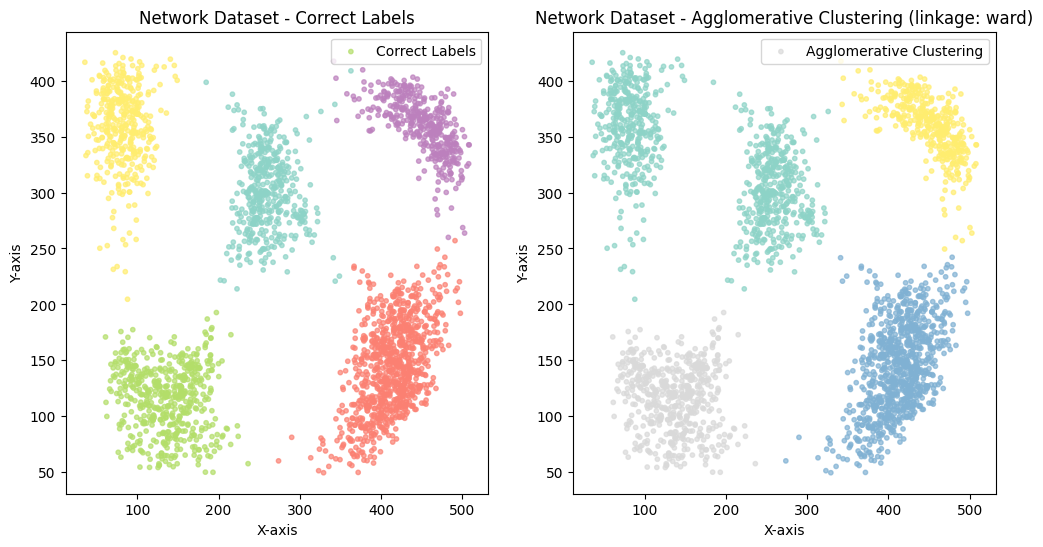

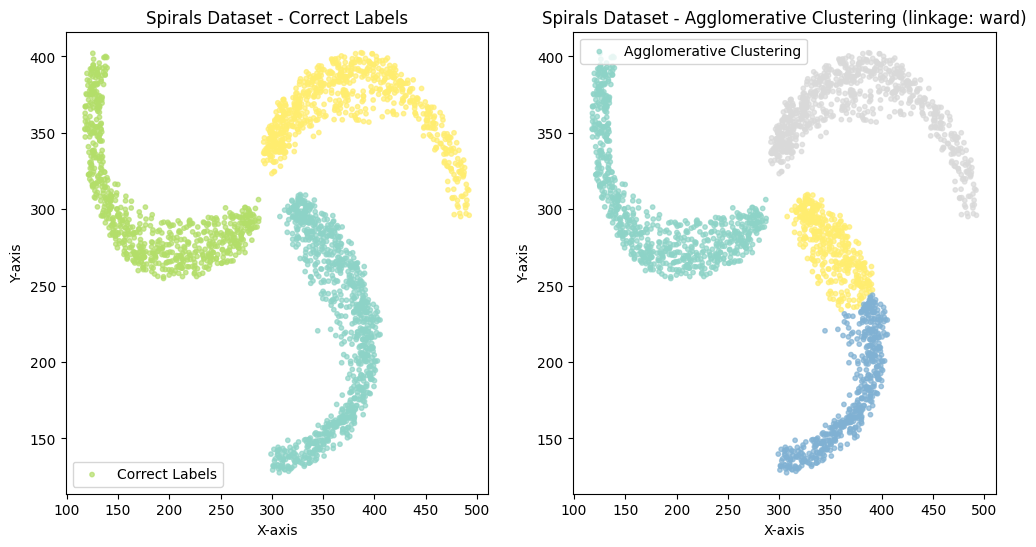

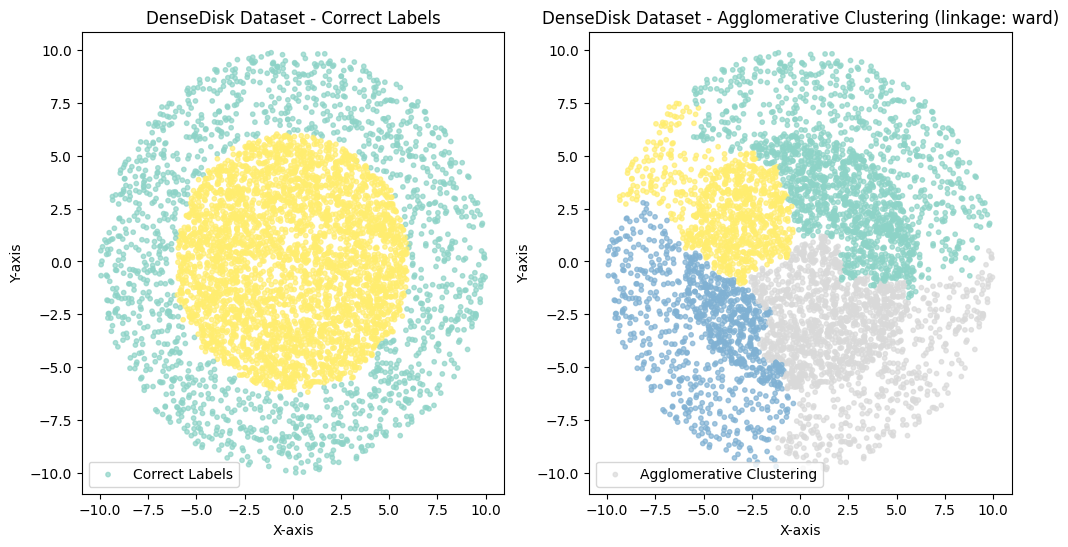

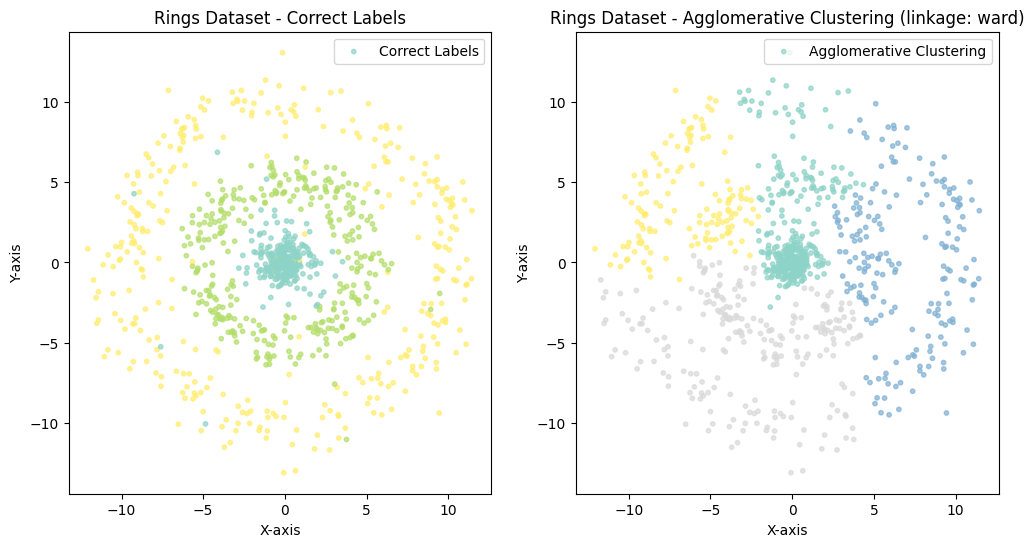

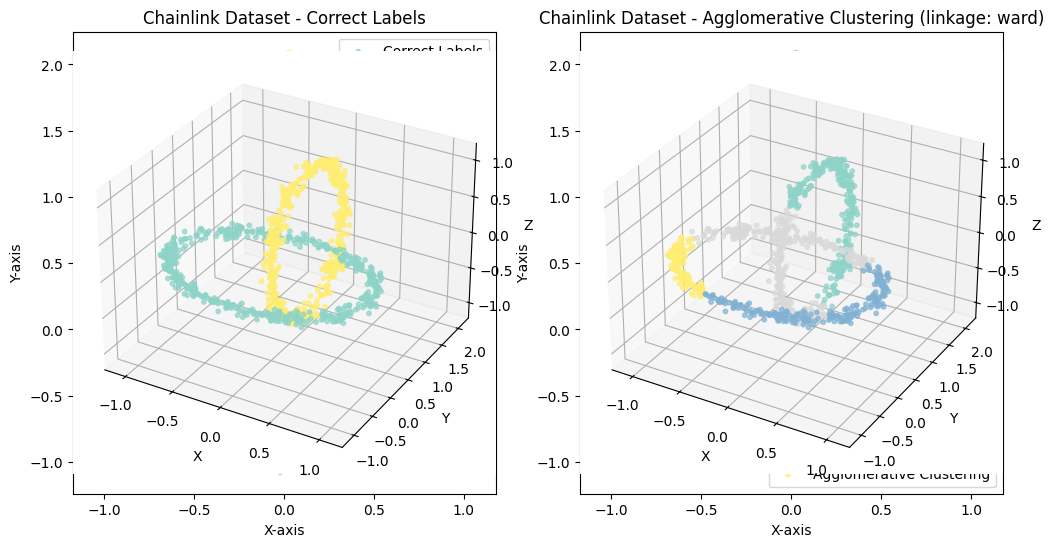

In [211]:
# put your answer here
def plot_clusters_agglomerative(data, predicted_labels, correct_labels, title, linkage='ward'):
  """
  Plots the data points colored by both correct labels and Agglomerative Clustering results.

  Args:
    data: The DataFrame containing the data (x, y columns).
    predicted_labels: A Series or array containing the labels predicted by Agglomerative Clustering.
    correct_labels: A Series or array containing the correct labels for the data points.
    title: The title of the plot.
    linkage: Linkage method for Agglomerative Clustering ('ward', 'complete', 'average', etc.).
             Defaults to 'ward'.
  """

  fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a figure and two axes objects

  # Scatter plot with transparency to avoid overplotting
  # Use axes[0] and axes[1] to access individual subplots
  axes[1].scatter(data['x'], data['y'], c=predicted_labels, cmap='Set3', s=10, alpha=0.7, label='Agglomerative Clustering')
  axes[0].scatter(data['x'], data['y'], c=correct_labels, cmap='Set3', s=10, alpha=0.7, label='Correct Labels')

  axes[0].set_xlabel('X-axis')
  axes[0].set_ylabel('Y-axis')
  axes[0].set_title(f"{title} - Correct Labels")
  axes[0].legend()

  # Set labels and title for each subplot
  axes[1].set_xlabel('X-axis')
  axes[1].set_ylabel('Y-axis')
  axes[1].set_title(f"{title} - Agglomerative Clustering (linkage: {linkage})")
  axes[1].legend()

  # Check if data has a 'z' column before creating 3D subplots
  if 'z' in data.columns:
    # 3D subplot for correct labels
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(data['x'], data['y'], data['z'], c=correct_labels, cmap='Set3', s=10, alpha=0.7)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')

    # 3D subplot for Agglomerative clustering results
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(data['x'], data['y'], data['z'], c=predicted_labels, cmap='Set3', s=10, alpha=0.7)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')

  plt.show()

plot_clusters_agglomerative(data_face, agg_face.labels_, color_face, "Face Dataset")
plot_clusters_agglomerative(data_chrome, agg_chrome.labels_, color_chrome, "Chrome Dataset")
plot_clusters_agglomerative(data_lines2, agg_lines2.labels_, color_lines2, "Lines2 Dataset")
plot_clusters_agglomerative(data_supernova, agg_supernova.labels_, color_supernova, "Supernova Dataset")
plot_clusters_agglomerative(data_network, agg_network.labels_, color_network, "Network Dataset")
plot_clusters_agglomerative(data_spirals, agg_spirals.labels_, color_spirals, "Spirals Dataset")
plot_clusters_agglomerative(data_densedisk, agg_densedisk.labels_, color_densedisk, "DenseDisk Dataset")
plot_clusters_agglomerative(data_rings, agg_rings.labels_, color_rings, "Rings Dataset")

plot_clusters_agglomerative(data_chainlink, agg_chainlink.labels_, color_chainlink, "Chainlink Dataset")

## C. Use DBSCAN to cluster each dataset

1. Create each copy of the dataset for Agglomerative Clustering

In [244]:
# put your answer here
data_face = face_df.copy()
data_chrome = chrome_df.copy()
data_lines2 = lines2_df.copy()
data_supernova = supernova_df.copy()
data_network = network_df.copy()
data_spirals = spirals_df.copy()
data_densedisk = densedisk_df.copy()
data_rings = rings_df.copy()
data_chainlink = chainlink_df.copy()

In [245]:
color_face = face_df['color']
color_chrome = chrome_df['color']
color_lines2 = lines2_df['color']
color_supernova = supernova_df['color']
color_network = network_df['color']
color_spirals = spirals_df['color']
color_densedisk = densedisk_df['color']
color_rings = rings_df['color']
color_chainlink = chainlink_df['color']

2. Drop the "color" column on all datasets

In [246]:
# put your answer here
data_face = data_face.drop('color', axis=1)
data_chrome = data_chrome.drop('color', axis=1)
data_lines2 = data_lines2.drop('color', axis=1)
data_supernova = data_supernova.drop('color', axis=1)
data_network = data_network.drop('color', axis=1)
data_spirals = data_spirals.drop('color', axis=1)
data_densedisk = data_densedisk.drop('color', axis=1)
data_rings = data_rings.drop('color', axis=1)
data_chainlink = data_chainlink.drop('color', axis=1)

3. Train a DBSCAN Clustering model for each dataset.

In [273]:
# put your answer here
def train_dbscan(data, eps=9.1, min_samples=10):
    """
    Trains a DBSCAN model on the dataset and adds a 'Cluster' column to the data.

    Args:
      data: DataFrame containing 'x', 'y', and optionally 'z' columns.
      eps: The DBSCAN eps parameter (neighborhood distance).
      min_samples: The DBSCAN min_samples parameter (minimum points to form a cluster).

    Returns:
      A tuple of (data with the new 'Cluster' column, DBSCAN predicted labels).
    """
    # Prepare data for 2D or 3D clustering
    if 'z' in data:
        X = data[['x', 'y', 'z']].values
    else:
        X = data[['x', 'y']].values

    # Train DBSCAN
    dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan_model.fit_predict(X)

    # Add the predicted clusters to the DataFrame
    data['Cluster'] = dbscan_labels
    return data, dbscan_labels

4. Add a "Cluster" column for each data set

In [274]:
# List of datasets and their correct labels
datasets = [
    ("Face Dataset", data_face, color_face),
    ("Chrome Dataset", data_chrome, color_chrome),
    ("Lines2 Dataset", data_lines2, color_lines2),
    ("Supernova Dataset", data_supernova, color_supernova),
    ("Network Dataset", data_network, color_network),
    ("Spirals Dataset", data_spirals, color_spirals),
    ("DenseDisk Dataset", data_densedisk, color_densedisk),
    ("Rings Dataset", data_rings, color_rings),
    ("Chainlink Dataset", data_chainlink, color_chainlink)
]

# Store the results in a dictionary
results = {}
for title, data, correct_labels in datasets:
    # Adjust DBSCAN parameters as needed
    data_with_clusters, dbscan_labels = train_dbscan(data, eps=9.1, min_samples=10)
    results[title] = (data_with_clusters, dbscan_labels, correct_labels)

5. Plot the Correct cluster and the DBSCAN cluster

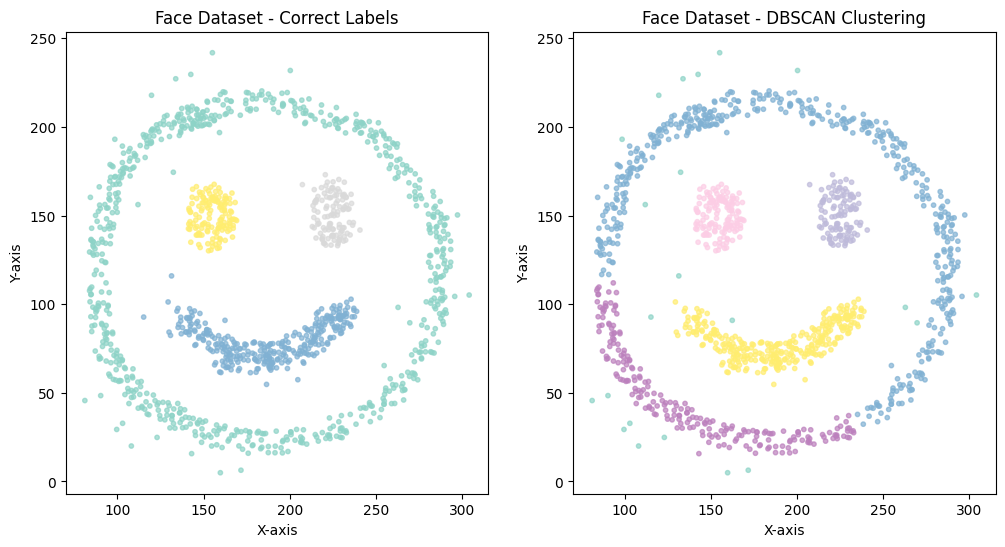

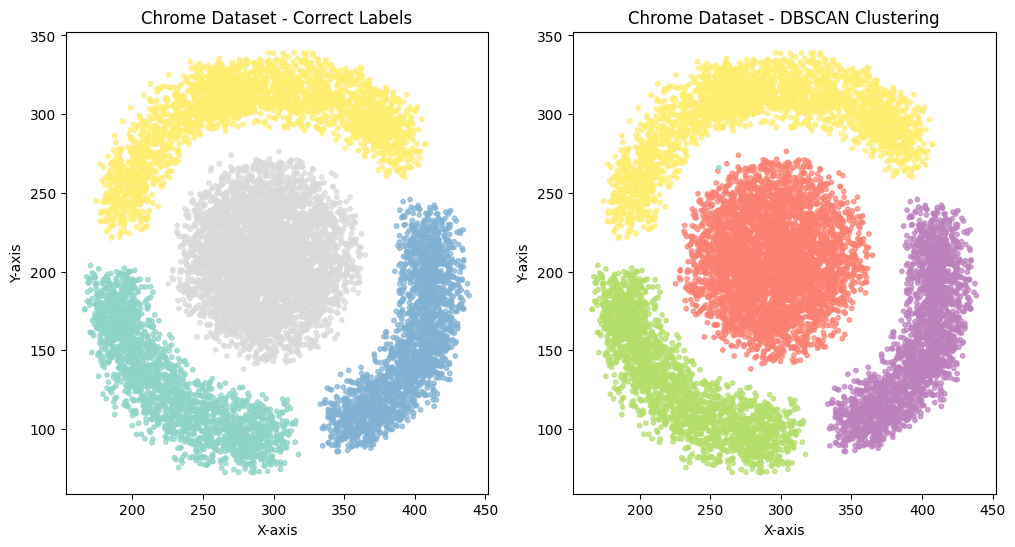

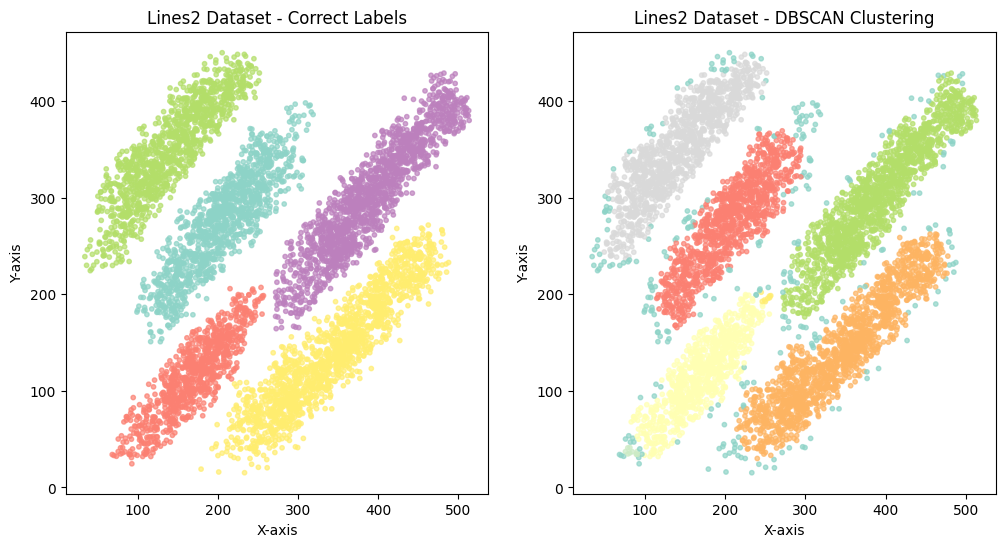

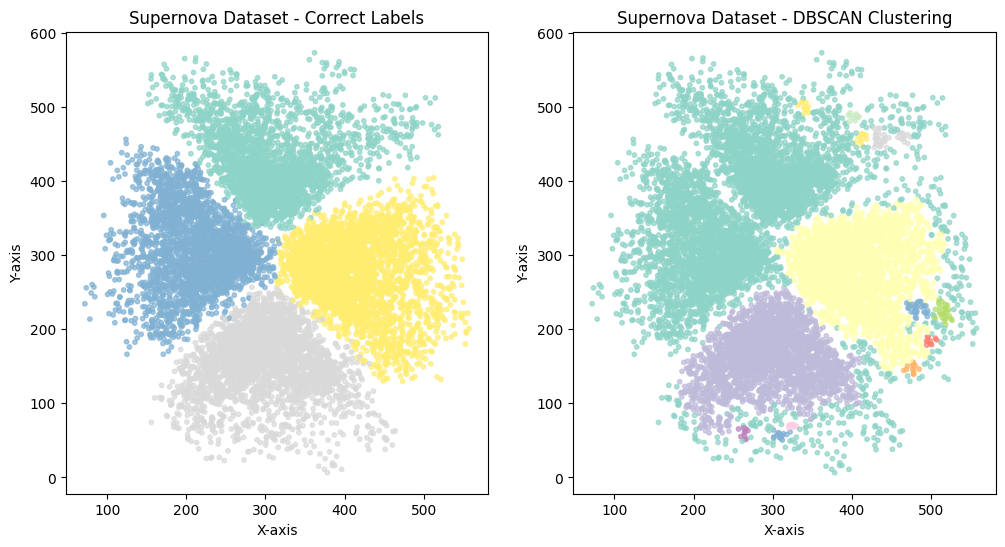

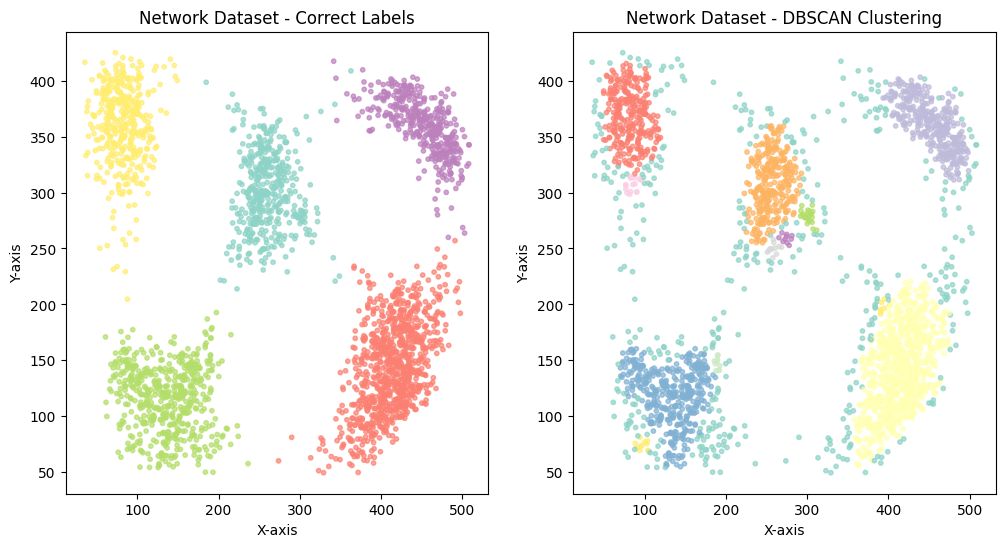

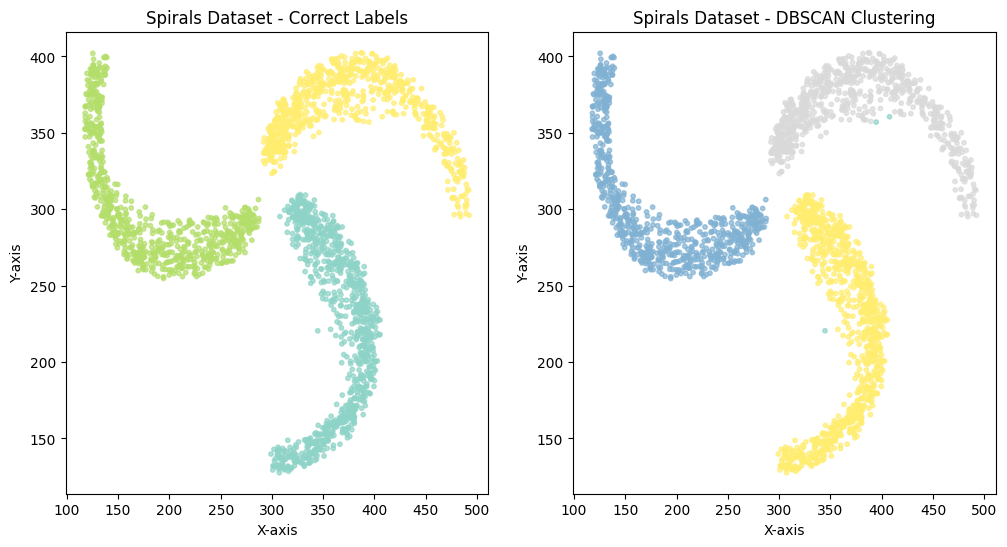

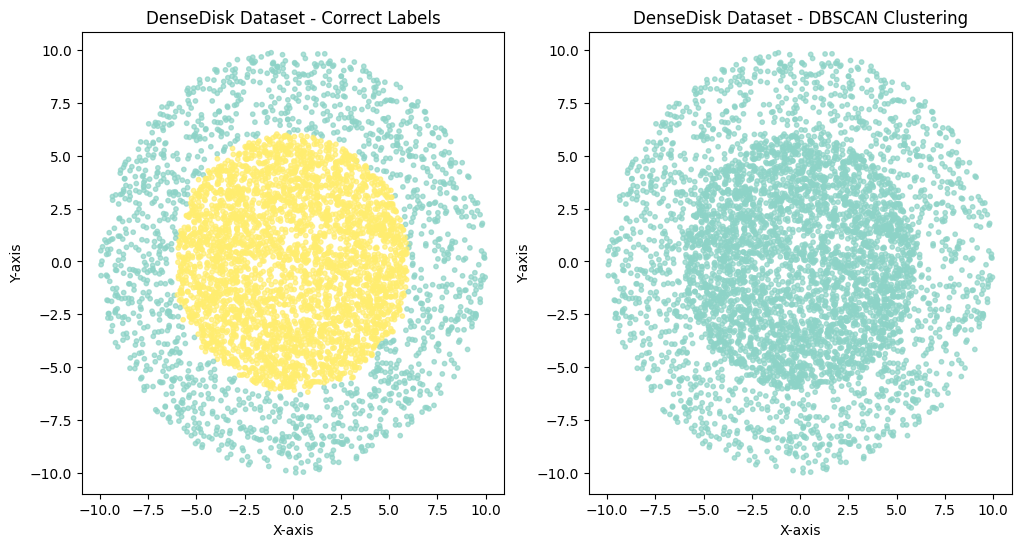

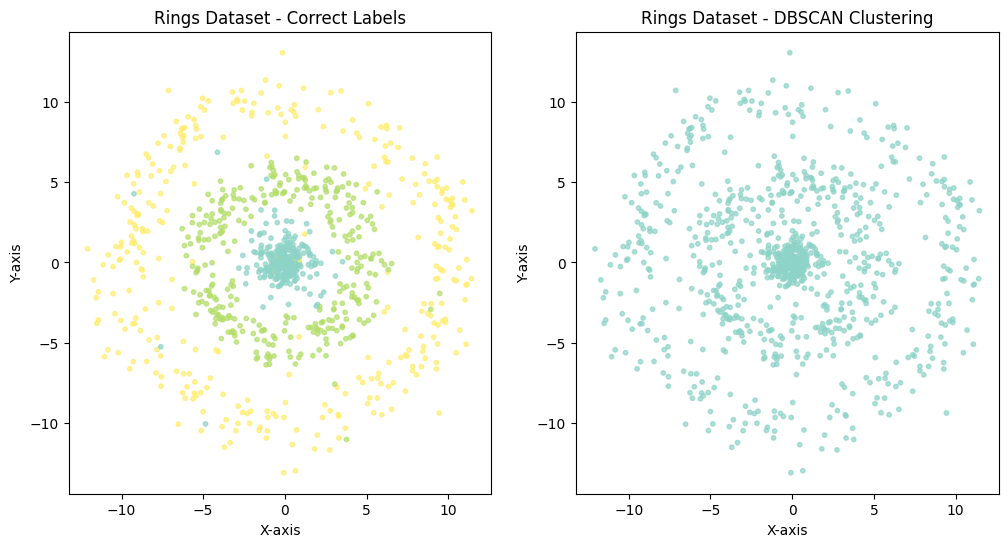

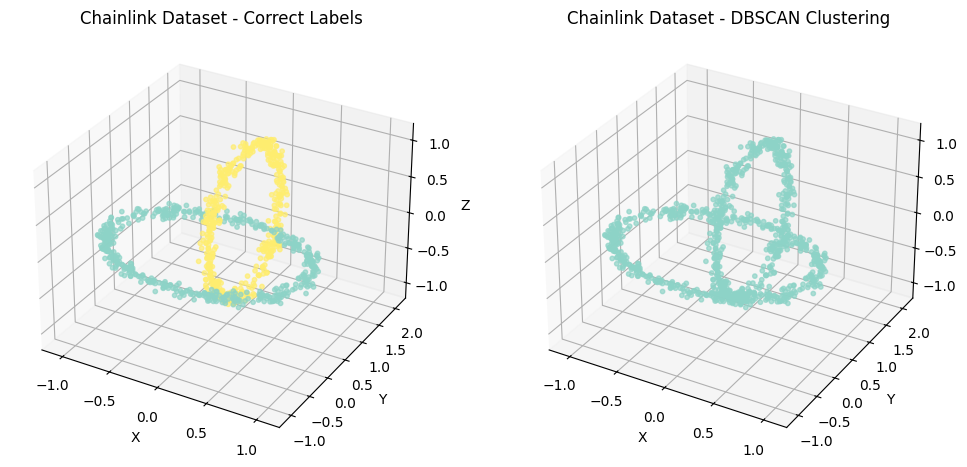

In [275]:
def plot_dbscan_clusters(data, predicted_labels, correct_labels, title):
    """
    Plots the data points colored by both correct labels and DBSCAN clustering results.

    Args:
      data: DataFrame containing 'x', 'y', and optionally 'z' columns.
      predicted_labels: Labels predicted by DBSCAN clustering.
      correct_labels: Correct labels for the dataset.
      title: The title of the plot.
    """
    if 'z' in data:  # If data contains a 'z' column, plot in 3D
        fig = plt.figure(figsize=(12, 6))

        # 3D scatter plot for correct labels
        ax1 = fig.add_subplot(121, projection='3d')
        ax1.scatter(data['x'], data['y'], data['z'], c=correct_labels, cmap='Set3', s=10, alpha=0.7)
        ax1.set_title(f"{title} - Correct Labels")
        ax1.set_xlabel('X')
        ax1.set_ylabel('Y')
        ax1.set_zlabel('Z')

        # 3D scatter plot for DBSCAN predicted labels
        ax2 = fig.add_subplot(122, projection='3d')
        ax2.scatter(data['x'], data['y'], data['z'], c=predicted_labels, cmap='Set3', s=10, alpha=0.7)
        ax2.set_title(f"{title} - DBSCAN Clustering")
        ax2.set_xlabel('X')
        ax2.set_ylabel('Y')
        ax2.set_zlabel('Z')

    else:  # If no 'z' column, plot in 2D
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        # Scatter plot for correct labels
        axes[0].scatter(data['x'], data['y'], c=correct_labels, cmap='Set3', s=10, alpha=0.7)
        axes[0].set_title(f"{title} - Correct Labels")
        axes[0].set_xlabel('X-axis')
        axes[0].set_ylabel('Y-axis')

        # Scatter plot for DBSCAN predicted labels
        axes[1].scatter(data['x'], data['y'], c=predicted_labels, cmap='Set3', s=10, alpha=0.7)
        axes[1].set_title(f"{title} - DBSCAN Clustering")
        axes[1].set_xlabel('X-axis')
        axes[1].set_ylabel('Y-axis')

    plt.show()

# Now plot the results using the stored values
for title, (data_with_clusters, dbscan_labels, correct_labels) in results.items():
    plot_dbscan_clusters(data_with_clusters, dbscan_labels, correct_labels, title)

## D. Compare all algorithms

1. Display the Correct cluster, K-means cluster, Agglomerative cluster and DBSCAN cluster in a single plot.

- Each row should contain each dataset
- Each column should contain each the correct cluster, k-means cluster, agglomerative cluster and DBSCAN cluster.

In [279]:
def train_kmeans_and_agglo(data, n_clusters=4, linkage='ward', random_state=42):
    """
    Trains K-Means and Agglomerative Clustering models.

    Args:
        data: DataFrame containing the data.
        n_clusters: The number of clusters.
        linkage: Linkage method for Agglomerative Clustering.
        random_state: Random state for K-Means.

    Returns:
        Tuple containing (kmeans_labels, agglo_labels).
    """
    # Train K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(data)
    kmeans_labels = kmeans.labels_

    # Train Agglomerative Clustering
    agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    agglo.fit(data)
    agglo_labels = agglo.labels_

    return kmeans_labels, agglo_labels

def plot_clusters_grid(data, correct_labels, kmeans_labels, agglo_labels, dbscan_labels, title):
    """
    Plots the clusters for different algorithms in a grid.

    Args:
        data: DataFrame containing the data.
        correct_labels: Correct labels for the dataset.
        kmeans_labels: Labels predicted by K-Means.
        agglo_labels: Labels predicted by Agglomerative Clustering.
        dbscan_labels: Labels predicted by DBSCAN.
        title: The title of the plot.
    """
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    # Correct labels
    axes[0].scatter(data['x'], data['y'], c=correct_labels, cmap='Set3', s=10)
    axes[0].set_title(f"{title} - Correct Labels")

    # K-Means labels
    axes[1].scatter(data['x'], data['y'], c=kmeans_labels, cmap='Set3', s=10)
    axes[1].set_title(f"{title} - K-Means Clusters")

    # Agglomerative labels
    axes[2].scatter(data['x'], data['y'], c=agglo_labels, cmap='Set3', s=10)
    axes[2].set_title(f"{title} - Agglomerative Clusters")

    # DBSCAN labels
    axes[3].scatter(data['x'], data['y'], c=dbscan_labels, cmap='Set3', s=10)
    axes[3].set_title(f"{title} - DBSCAN Clusters")

    plt.show()